In [1]:
#
# Data Visualisation in Python
#

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#
# Load and prepare data
#
# load data from file
data = pd.read_csv('radio_responses.csv')
# convert all column names to lower case
data.columns = data.columns.str.lower()
# select subset of data to analyse
# let's take music, dance, education, age, height, weight, and gender
cols = ['music', 'dance', 'age', 'height', 'weight', 'gender', 'education']
# create new dataframe with the selected columns only
df = data[cols]
# drop duplicate entries
df = df.drop_duplicates()
# check dimensions
print('Data dim:', df.shape)
# preview the data
df.head(4)
print(df.head(4))

Data dim: (992, 7)
   music  dance   age  height  weight  gender                education
0    5.0    2.0  20.0   163.0    48.0  female  college/bachelor degree
1    4.0    2.0  19.0   163.0    58.0  female  college/bachelor degree
2    5.0    2.0  20.0   176.0    67.0  female         secondary school
3    5.0    2.0  22.0   172.0    59.0  female  college/bachelor degree


In [4]:
#
# Convert data types
#
# have a look at fields music and dance:
# they are categorical values, but represented as numbers (1..5)
# so we need to convert them:
# let's replace those numbers 1..5 with labels (categories)
#
# This replacement will be based on a dictionary:
ratings = {1:'1-vm_disliked', 2:'2-disliked', 3:'3-neutral', 4:'4-liked', 5:'5-vm_liked'}
# (vm = very much)
#
# Executing replacement will convert these values:
#    music  dance
# 0    5.0    2.0
# 1    4.0    2.0
# 2    5.0    2.0
#
# into these:
#         music  dance
# 0  5-vm_liked    2.0
# 1     4-liked    2.0
# 2  5-vm_liked    2.0
#
# The problem is, if you execute this replacement again,
# all these values will be replaced with None:
#   music  dance
# 0  None    2.0
# 1  None    2.0
# 2  None    2.0
#
# This happens because the current values in the dataset
# (e.g. '5-vm_liked' or '4-liked') cannot be longer found
# in the replacement dicitionary (they only contain values 1,2,3,4,5) -
# and that's why Python replaces them with None
#
# To resolve this, we add five more replacement rules
# into the replacement dicitionary, which tell Python
# to replace values like '5-vm_liked' with itself
#
# Therefore, the modified replacement dicitionary
# will look like this:
ratings = {1:'1-vm_disliked', 2:'2-disliked', 3:'3-neutral', 4:'4-liked', 5:'5-vm_liked',
           '1-vm_disliked':'1-vm_disliked', '2-disliked':'2-disliked',
           '3-neutral':'3-neutral', '4-liked':'4-liked', '5-vm_liked':'5-vm_liked'}
#
# Notice five additional rules here:
# every value that has been converted already
# (e.g. '5-vm_liked' or '3-neutral') # with be replaced with itself
# Such replacement can be executed multiple times without losing data

# replace values for both fields
df.music = list(map(ratings.get, df.music))
df.dance = list(map(ratings.get, df.dance))
print(df.head(3))

        music       dance   age  height  weight  gender  \
0  5-vm_liked  2-disliked  20.0   163.0    48.0  female   
1     4-liked  2-disliked  19.0   163.0    58.0  female   
2  5-vm_liked  2-disliked  20.0   176.0    67.0  female   

                 education  
0  college/bachelor degree  
1  college/bachelor degree  
2         secondary school  


In [5]:
##
## Mapping
##
## Mapping means replacing one set of values with another set of values
## e.g. replace numbers with labels
##
## Replacement map uses dictionary:
## ratings = {1:'vm_disliked', 2:'disliked', 3:'neutral', 4:'liked', 5:'vm_liked'}
##
## Actual replacement:
## df.music = list(map(ratings.get, df.music))
##
## How it works
## function map() creates an implicit loop,
## which iterates over the second argument (df.music)
## and inside of that implicit loop it passes values from that list
## as the input to the first argument (ratings.get)
## It is confusing that there are no brackets at ratings.get,
## but effectively it does the following:
##
## result = []
## for x in df.music:
##     result.append(ratings.get(x))
##
## output of this loop is accumulated in an implicit array (result),
## which is then passed to the outer function list() 
## and then is stored back into column df.music
##
## note that ratings.get(3) returns '3-neutral'

In [6]:
# So, now this is our dataset:
print('Data dim:', df.shape)
df.head(5)

Data dim: (992, 7)


,music,dance,age,height,weight,gender,education
0,5-vm_liked,2-disliked,20.0,163.0,48.0,female,college/bachelor degree
1,4-liked,2-disliked,19.0,163.0,58.0,female,college/bachelor degree
2,5-vm_liked,2-disliked,20.0,176.0,67.0,female,secondary school
3,5-vm_liked,2-disliked,22.0,172.0,59.0,female,college/bachelor degree
4,5-vm_liked,4-liked,20.0,170.0,59.0,female,secondary school


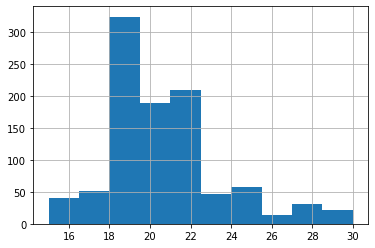

In [7]:
# simple histogram
df.age.hist()
plt.show()

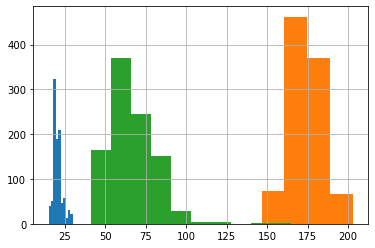

In [8]:
# plotting three variables together
df.age.hist()
df.height.hist()
df.weight.hist()
plt.show()

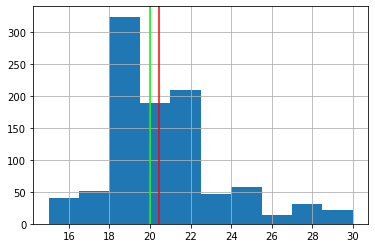

In [9]:
# plotting mean (red) and median (lime)
df.age.hist()
plt.axvline(x=df['age'].mean(),   color='red')
plt.axvline(x=df['age'].median(), color='lime')
plt.show()

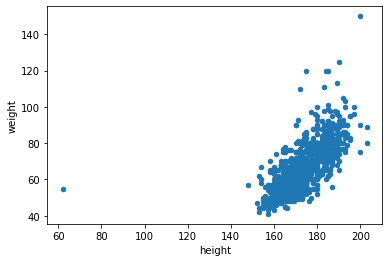

In [10]:
# scatterplot required two variables
df.plot.scatter('height', 'weight')
plt.show()
## just to remind that scatterplot is used for plotting
## one numeric variable against another numeric variable

In [11]:
# you might notice an outlier on the left
# how can we find it?
# you clearly see that its height is below 80:
df[df.height < 80]

,music,dance,age,height,weight,gender,education
676,5-vm_liked,2-disliked,20.0,62.0,55.0,female,college/bachelor degree


In [12]:
# here it is: its height is 62
# shall we remove it?
# there are multiple ways of removing it,
# the simplest one is
# to take all the records where height IS NOT 62:
print(df.shape)
df = df.loc[df.height != 62]
print(df.shape)
# now we have 991 record instead of 992

(992, 7)
(991, 7)


In [13]:
# we could also use condition like df.height > 80
# however, this will also remove all the records where height is missing
# (that's why it's a good idea to cross check our code with df.shape, printed before and after -
# just to confirm how many records were removed)

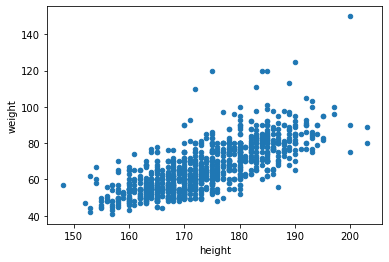

In [14]:
# build the scatter plot again:
df.plot.scatter('height', 'weight')
plt.show()
## notice this graph looks much more detailed,
## because it no longer need to stretch the x axis (height) to 62

In [15]:
## by the way, there was another point far away from the main cluster,
## the one with weight of 150 -
## why we didn't believe it was also an outlier?
##
## because if we consider weight and height together,
## we can imagine someone 198 cm tall having weight of 145,
## but it's difficult to imagine someone being 62cm tall -
## most likely, that was supposed to be 162cm

In [16]:
# out of the curiosity (that killed the cat),
# what is the correlation between height and weight?
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.735736
weight,0.735736,1.000000


(991, 2)
(961, 2)


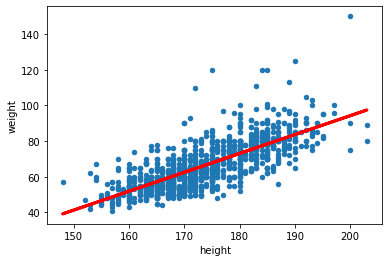

In [17]:
#
# How about approximating with a line?
# This is called linear regression and we will deal a lot of it later in the course.
#

# let's take the subset first:
dfx = df[['height', 'weight']]
print(dfx.shape)

# missing values will create problems -
# so we need to remove them first
dfx = dfx.dropna()
print(dfx.shape)

# notice that 30 records were removed

# calculate the best fit line
# the equation of a line is y = mx + c
# and we will now calculate m and c
m, c = np.polyfit(dfx.height, dfx.weight, 1)
# plot the line of best fit
df.plot.scatter('height', 'weight')
plt.plot(dfx.height, m * dfx.height + c, 'r-', linewidth=3)
plt.show()
#
# plt.plot() requires x and y coordinates:
# (x, y)
# y = mx + c
# (x, y) => (x, mx + c)
# where x is dfx.height, therefore
# (x, mx + c) => (dfx.height, m * dfx.height + c)

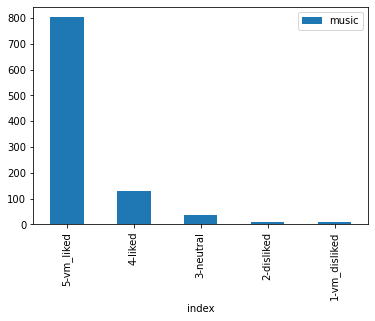

In [18]:
# To build bar plot,
# we need to slightly transform the dataset:
dfx = pd.DataFrame(df['music'].value_counts()).reset_index()
dfx.plot.bar('index', 'music')
plt.show()

In [19]:
#
# Simple visualisation using pyplot
#
# output plots inline, within frontend
# %matplotlib inline
# (doens't really have any efect in Jupyter)

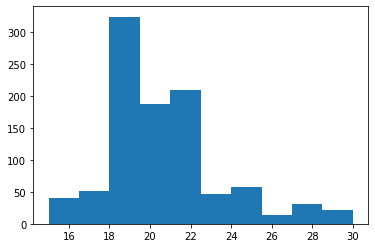

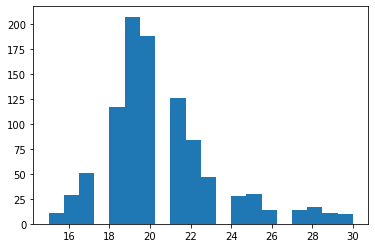

In [20]:
# simple histogram
plt.hist(df.age)
plt.show()

# change number of intervals (bins)
plt.hist(df.age, bins = 20)
plt.show()

In [21]:
#
# Simple visualisation using Seaborn
# Seaborn docs: https://seaborn.pydata.org/api.html
#

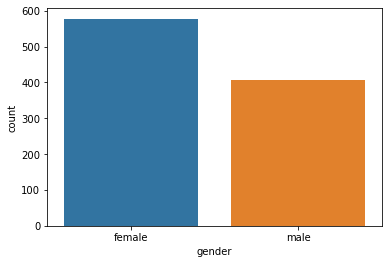

In [22]:
# display number of instances of a categorical variable
sns.countplot(x='gender', data = df)
plt.show()
# x='gender' tells which categories to group by

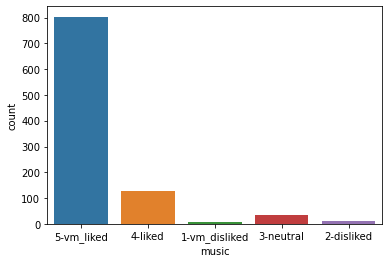

In [23]:
sns.countplot(x=df.music)
plt.show()

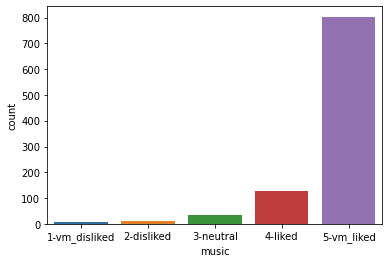

In [24]:
# change the order of categories
sns.countplot(x=df.music, order=['1-vm_disliked', '2-disliked','3-neutral','4-liked','5-vm_liked'])
plt.show()

In [25]:
# define list of categories for future use in sorting:
list_of_categories = ['1-vm_disliked', '2-disliked','3-neutral','4-liked','5-vm_liked']

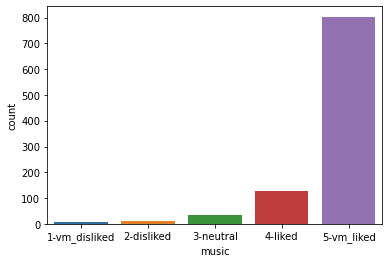

In [26]:
sns.countplot(x=df.music, order=list_of_categories)
plt.show()

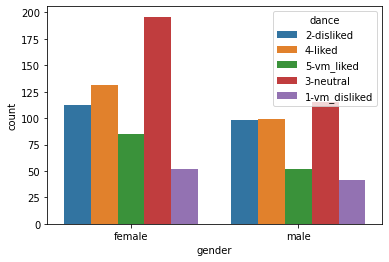

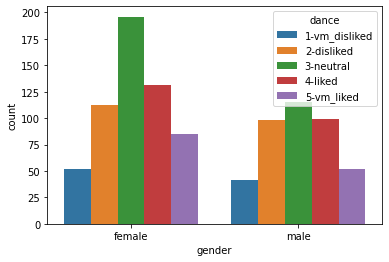

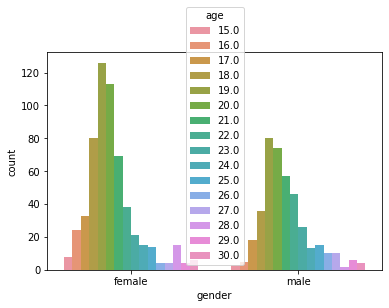

In [27]:
# the same as before, but with a sub split:
# by categorical variable...
sns.countplot(x='gender', hue='dance', data = df)
plt.show()
sns.countplot(x='gender', hue='dance', data = df, hue_order=list_of_categories)
plt.show()
# ... and numeric one
sns.countplot(x='gender', hue='age', data = df)
plt.show()

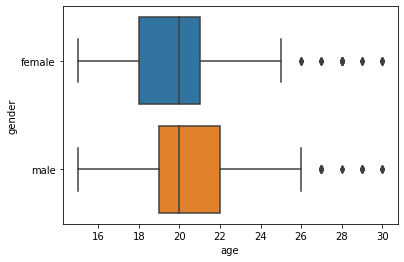

In [28]:
# there is alternative way to represent the distribution of age within gender:
sns.boxplot(x=df.age, y=df.gender)
plt.show()

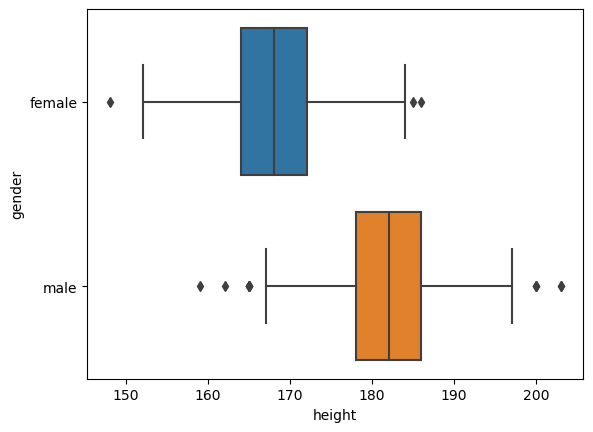

In [29]:
# distribution of height within gender
sns.boxplot(x=df['height'], y=df['gender'])
plt.show()

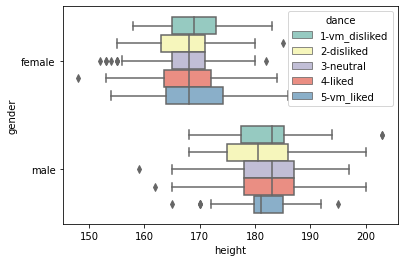

In [29]:
# distribution of dance preferences within gender by height
sns.boxplot(x='height', y='gender', hue='dance', data = df,
            palette = 'Set3', hue_order=list_of_categories)
plt.show()
# you can see how dance preferences depend on gender and height

## for exapmle, you might claim that dance preferences of men
## depend on their height, whilst this isn't the case for women

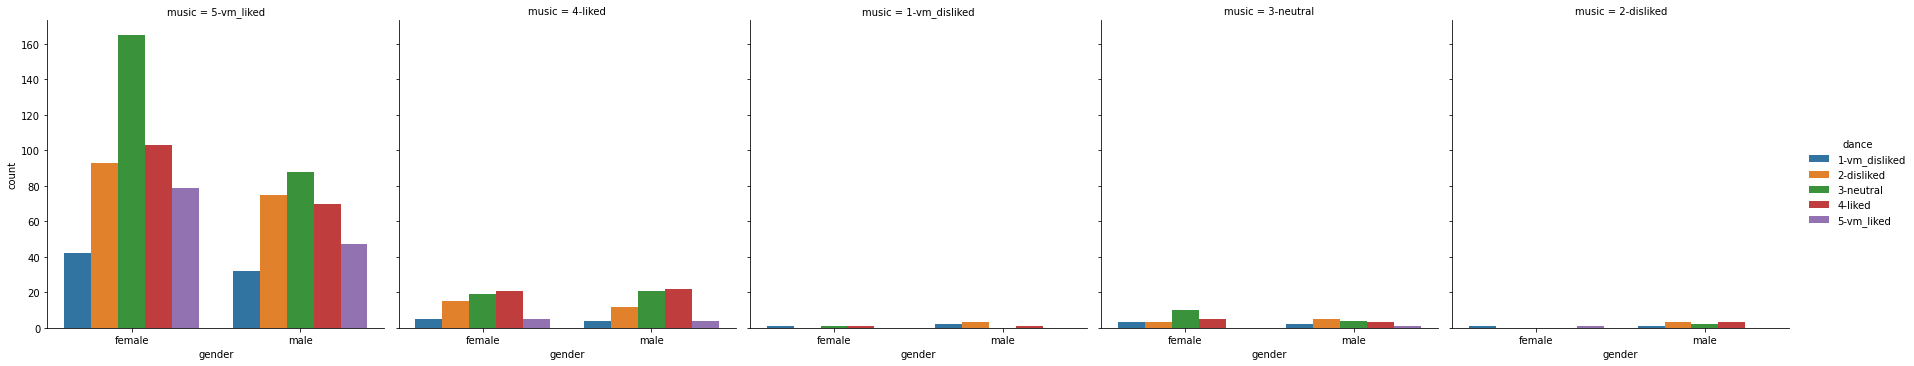

In [30]:
# distribution by dance (colour) and music (five sections) within gender
sns.catplot(x='gender', hue = 'dance', col='music', data = df,
            kind = 'count', hue_order=list_of_categories)
plt.show()

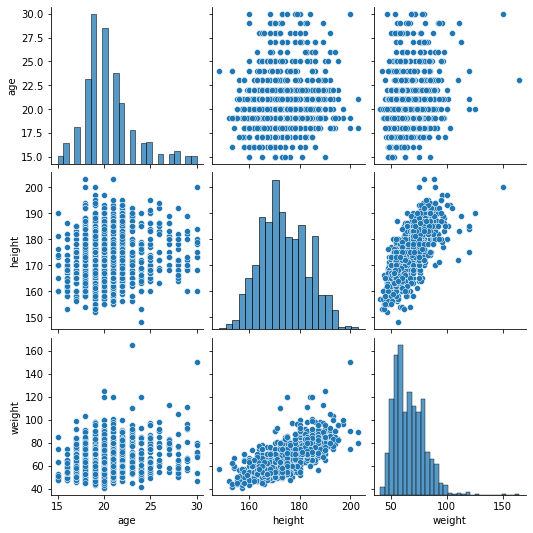

In [31]:
# matrix 3x3 showing three numeric variables
sns.pairplot(df)
plt.show()

In [32]:
## function pairplot() builds all possible combinations of scatter plots
## between two numeric columns of a dataset (it ignores categorical variables)
##
## pick any graph and check labels against its row and column
##
## the main diagonal displays distribution histograms for each variable
## the output is symmetrical against the main diagonal
## (since weight vs height is the same as height vs weight)
## so you only need the half of the graph above the main diagonal
## (the bottom half it is a mirror flip)

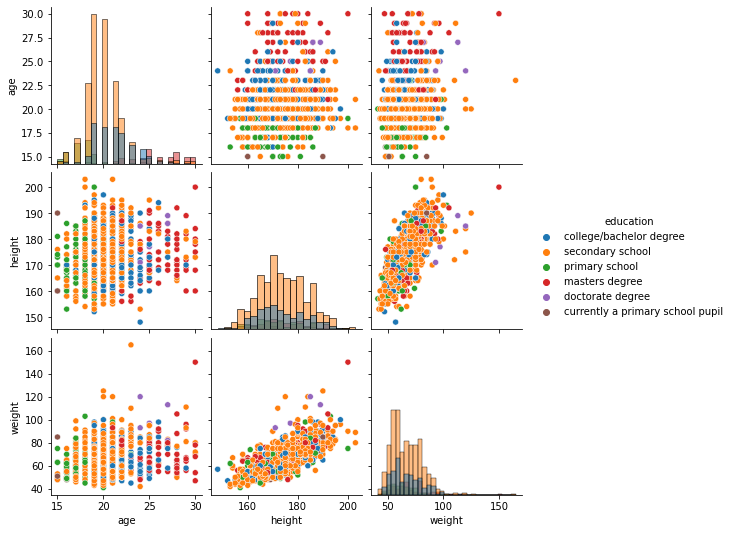

In [33]:
# the same matrix as before, but with education showed in colour
sns.pairplot(df, hue = 'education', diag_kind = 'hist')
plt.show()
#
# look at the histogram for age
# you can clearly notice primary school (green) on the left,
# and masters degree (red) on the right

In [34]:
#
# more visuals using seaborn and different dataset
#
df1 = data[['age', 'folk', 'dance']]
df1 = df1.drop_duplicates()
print(df1.head())
#
# one numeric (age) plus two categorical variables (folk and dance)
df1['folk'] = list(map(ratings.get, df1['folk']))
df1['dance'] = list(map(ratings.get, df1['dance']))
print(df1.head())

    age  folk  dance
0  20.0   1.0    2.0
1  19.0   1.0    2.0
2  20.0   2.0    2.0
3  22.0   1.0    2.0
4  20.0   3.0    4.0
    age           folk       dance
0  20.0  1-vm_disliked  2-disliked
1  19.0  1-vm_disliked  2-disliked
2  20.0     2-disliked  2-disliked
3  22.0  1-vm_disliked  2-disliked
4  20.0      3-neutral     4-liked


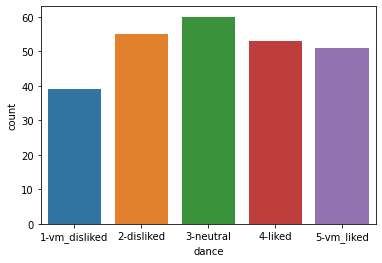

In [35]:
# simple count by dance preferences
sns.countplot(x='dance', data = df1, order=list_of_categories)
plt.show()
## this graph isn't impressive at all -
## you can do it in Excel in 2 seconds and 1.5 mouse clicks

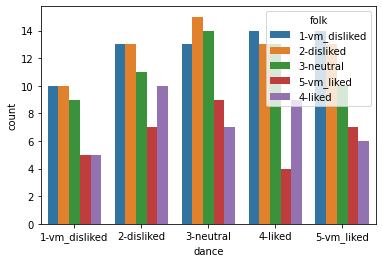

In [36]:
# however, let's add second variable...
sns.countplot(x='dance', hue = 'folk', data = df1, order=list_of_categories)
plt.show()

In [37]:
# notice that whoever doesn't like dance also doesn't like folk -
# or maybe they just don't like anything?

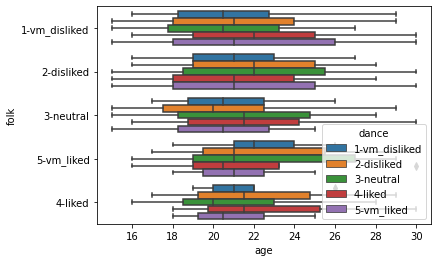

In [38]:
# ...and now drop in third variable!
sns.boxplot(x='age', y='folk', hue ='dance', data = df1, hue_order=list_of_categories)
plt.show()

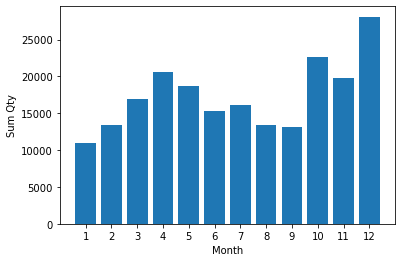

In [39]:
#
# OPTIONAL
# Groupings
#
salesData = pd.read_csv('sales.csv')
salesData.head(3)

salesData.groupby(['Product']).sum(numeric_only=True)
salesData.groupby(['Product']).sum(numeric_only=True)['Quantity Ordered']
salesData.groupby(['Month']).sum(numeric_only=True)['Quantity Ordered']

months = range(1,13)
plt.bar(months, salesData.groupby(['Month']).sum(numeric_only=True)['Quantity Ordered'])
plt.xticks(months)
plt.ylabel('Sum Qty')
plt.xlabel('Month')
plt.show()

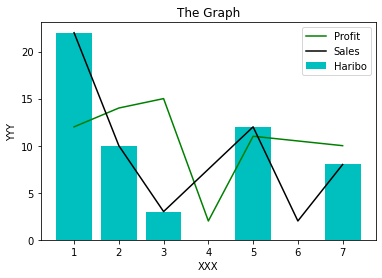

In [40]:
#
# OPTIONAL
# Building graphs directly from data points
#
plt.plot([1, 2, 3, 4, 5, 7], [12, 14, 15, 2, 11, 10], color='g', label='Profit')
plt.plot([1, 2, 3, 5, 6, 7], [22, 10, 3, 12, 2, 8],   color='k', label='Sales')
plt.bar([1, 2, 3, 5, 7], [22, 10, 3, 12, 8],          color='c', label='Haribo')
plt.title('The Graph')
plt.xlabel('XXX')
plt.ylabel('YYY')
plt.legend(loc='upper right') # upper/center/lower + left/center/right
plt.show()